<a href="https://colab.research.google.com/github/irythmgarg/Missing_data_complete_case_Analysis/blob/main/Missing_data_complete_case_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Complete Case Analysis for missing data**


in this method we delete the entire row having missing data in any of the column in the row

In [148]:
import pandas as pd # import pandas class
import numpy as np #import numpy

In [149]:
df=pd.read_csv('/content/titanic.csv',usecols=['Survived'	,'Pclass','Sex',	'Age',	'Fare',	'Embarked']); # dataset with only required features
df.head() # first five rows of the dataset

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [150]:
df.isnull().sum() # columnwise null values in the dataFrame

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [151]:
x=df.iloc[:,1:]; # independent featurs
y=df.iloc[:,0]; #dependent featurs
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [152]:
len(df)

891

In [154]:
from sklearn.model_selection import train_test_split # import train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0);

In [155]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked
140,3,female,NaN,15.2458,C
439,2,male,31.0,10.5000,S
817,2,male,31.0,37.0042,C
378,3,male,20.0,4.0125,C
491,3,male,21.0,7.2500,S


In [156]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked
495,3,male,NaN,14.4583,C
648,3,male,NaN,7.5500,S
278,3,male,7.0,29.1250,Q
31,1,female,NaN,146.5208,C
255,3,female,29.0,15.2458,C


In [157]:
x_train

,Pclass,Sex,Age,Fare,Embarked
140,3,female,NaN,15.2458,C
439,2,male,31.0,10.5000,S
817,2,male,31.0,37.0042,C
378,3,male,20.0,4.0125,C
491,3,male,21.0,7.2500,S
...,...,...,...,...,...
835,1,female,39.0,83.1583,C
192,3,female,19.0,7.8542,S
629,3,male,NaN,7.7333,Q
559,3,female,36.0,17.4000,S


In [158]:
x_train[x_train[[col for col in x_train.columns]].isnull().any (axis=1)] # searches if any

,Pclass,Sex,Age,Fare,Embarked
140,3,female,NaN,15.2458,C
358,3,female,NaN,7.8792,Q
674,2,male,NaN,0.0000,S
727,3,female,NaN,7.7375,Q
428,3,male,NaN,7.7500,Q
...,...,...,...,...,...
849,1,female,NaN,89.1042,C
87,3,male,NaN,8.0500,S
277,2,male,NaN,0.0000,S
359,3,female,NaN,7.8792,Q


In [159]:
x_train_trans=x_train.dropna()
x_test_trans=x_test.dropna() # drop the rows with null values
x_train_trans

,Pclass,Sex,Age,Fare,Embarked
439,2,male,31.0,10.5000,S
817,2,male,31.0,37.0042,C
378,3,male,20.0,4.0125,C
491,3,male,21.0,7.2500,S
331,1,male,45.5,28.5000,S
...,...,...,...,...,...
763,1,female,36.0,120.0000,S
835,1,female,39.0,83.1583,C
192,3,female,19.0,7.8542,S
559,3,female,36.0,17.4000,S


In [160]:
x_train

,Pclass,Sex,Age,Fare,Embarked
140,3,female,NaN,15.2458,C
439,2,male,31.0,10.5000,S
817,2,male,31.0,37.0042,C
378,3,male,20.0,4.0125,C
491,3,male,21.0,7.2500,S
...,...,...,...,...,...
835,1,female,39.0,83.1583,C
192,3,female,19.0,7.8542,S
629,3,male,NaN,7.7333,Q
559,3,female,36.0,17.4000,S


In [164]:
len(x_test_trans)

143

In [163]:
len(x_test)

179

<Axes: xlabel='Age', ylabel='Density'>

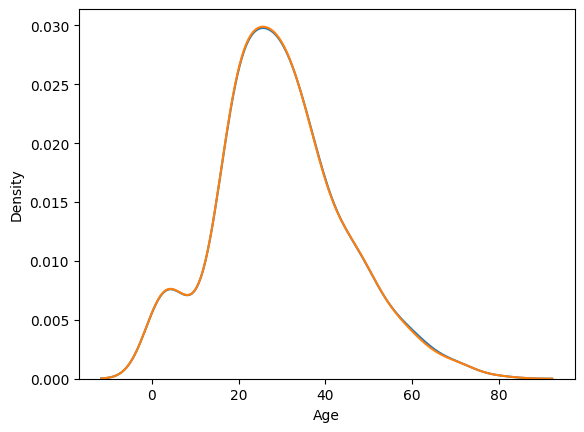

In [161]:
import seaborn as sns
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train_trans['Age'])
# compare prability distribution of the both ages with and without imputation

In [ ]:
# do same for the x_test

<Axes: xlabel='Age', ylabel='Density'>

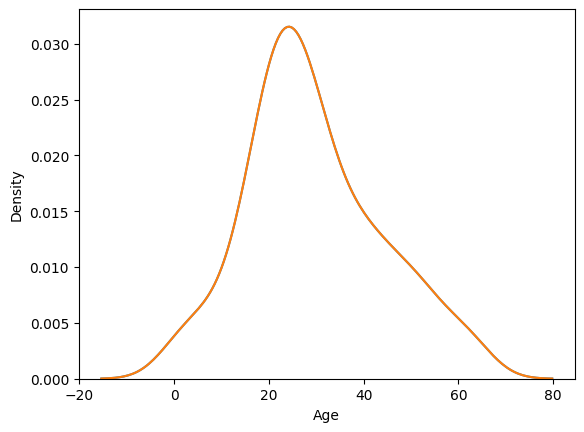

In [162]:
sns.kdeplot(x_test['Age'])
sns.kdeplot(x_test_trans['Age'])

In [ ]:
# as from the above figures we can see that there are only small deviations in the kde plot
# so we can apply this method of rows removal